In [65]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [66]:
import numpy as np
import pandas as pd

In [67]:
import datetime as dt
from datetime import datetime


# Reflect Tables into SQLAlchemy ORM

In [68]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [69]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")


In [70]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [71]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [72]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [73]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [74]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
# Need column names and data types for query
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [75]:
#==============================================================================================
#1.
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#   ascending (asc) order is the default
#   last date on table = 2017-08-23; 
#   
#==============================================================================================
# order date in descending order


# must include [0] or an error occurs
last_tbl_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
#print(last_tbl_date)

#strptime() is used to conert a time to a string
# when data is a string and you want to compute the "date-structure" use "strptime" for
# string format time
#
# datetime object looks like this:  (2015,7,19,22,7,44,377000)
# strftime formats date like this:  Sun, 19 July, 2015
#===============================================================================================
last_tbl_date = datetime.strptime(last_tbl_date , '%Y-%m-%d')

last_year = last_tbl_date - dt.timedelta(days=365)
print(last_year, last_tbl_date)

2016-08-23 00:00:00 2017-08-23 00:00:00


In [76]:
#==============================================================================================
# 2.
# Select only the 'date' and 'prcp' values
# last date = 2017-08-23
# prv year  = 2016-08-23
#==============================================================================================
       
sel = [Measurement.date, Measurement.prcp]

date_precip = session.query(*sel).filter(Measurement.date >= last_year).filter(Measurement.date <= last_tbl_date).all()

#date_precip = session.query(*sel).filter(Measurement.date <= last_year).all()
date_precip

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [77]:
#==============================================================================================
# 3.
# Load the query results into a Pandas DataFrame and set the index to the date column
#==============================================================================================
date_precip_df = pd.DataFrame(date_precip).set_index('date')
date_precip_df.head()


,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [78]:
#==============================================================================================
# 4.
# Sort the dataframe values by date
#==============================================================================================
# There were several (6 or more) missing records that need to be dropped "NaN"
date_precip_df.sort_values(by=['date'])
date_precip_df.dropna(how='any')

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13
2016-09-01,0.00


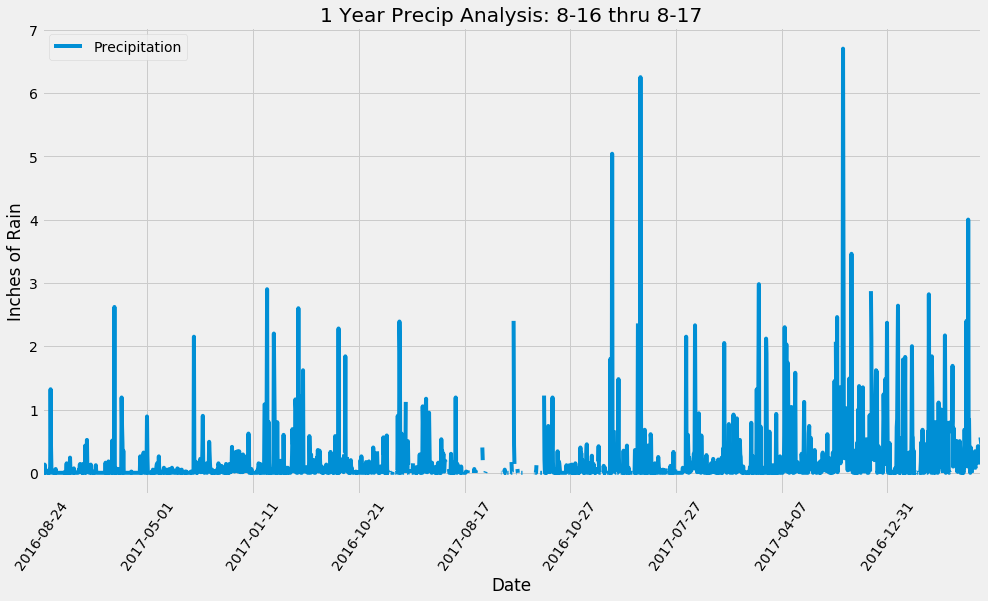

In [79]:
#==============================================================================================
# 5.
#   Plot the results using the DataFrame 'plot' method
#==============================================================================================

date_precip_df.plot(figsize = (15, 8))
plt.xlabel("Date")
plt.ylabel("Inches of Rain")
plt.title("1 Year Precip Analysis: 8-16 thru 8-17")
plt.legend(["Precipitation"])
plt.xticks(rotation=55)
plt.show()

In [80]:
#==============================================================================================
# 6.
#  Use Pandas to calcualte the summary statistics for the precipitation data
#  The describe() function computes a summary of statistics pertaining to the DataFrame columns
#==============================================================================================
date_precip_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [82]:
#==============================================================================================
# 7.
#  Design a query to show how many stations are available in this dataset
#  
#==============================================================================================
stations_cnt = session.query(Station).count()
print("{} stations available.".format(stations_cnt))

9 stations available.


In [83]:
#==============================================================================================
# 8.
#  Design a query to show how many stations are available in this dataset
#  what are the most active stations? (i.e. what stations have the most rows)?
#  list the stations and the counts in descending order. 
#==============================================================================================

the_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
the_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [84]:
#==============================================================================================
# 9.
# Using the station id from the previous query, 
# -calculate the lowest temperature recorded 
# -highest temperature recorded 
# -average temperature most active station
#==============================================================================================
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == the_active_stations[0][0]).all()[0][0]

highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == the_active_stations[0][0]).all()[0][0]

average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == the_active_stations[0][0]).all()[0][0]
#[(54.0, 85.0, 71.66378066378067)]

In [85]:
print(f' lowest temp = ({lowest_temp}°F ) --  highest temp = \
({highest_temp}°F)--  average temp is {average_temp}°F.')


 lowest temp = (54.0°F ) --  highest temp = (85.0°F)--  average temp is 71.66378066378067°F.


In [86]:
#==============================================================================================
# 10.
# Choose the station with the highest number of temperature observations.
#==============================================================================================

sel = [Measurement.date, Measurement.tobs]

measurements = session.query(*sel).filter(Measurement.date > last_year).filter(Measurement.station == the_active_stations[0][0]).all()



![precipitation](Images/station-histogram.png)

In [87]:
#==============================================================================================
# 11.
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
#==============================================================================================
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


print(calc_temps('2017-07-23', '2017-08-08'))

sel = [Measurement.date, Measurement.tobs]

measurement_results = session.query(*sel).filter(Measurement.date > last_year).filter(Measurement.station == the_active_stations[0][0]).all()


[(72.0, 79.07865168539325, 84.0)]


In [89]:
#==============================================================================================
# 12.
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#==============================================================================================

print(calc_temps('2012-02-28', '2012-03-05'))
#temps = calc_temps('2017-03-21', '2017-03-28')
#print(temps)



[(62.0, 69.57142857142857, 74.0)]


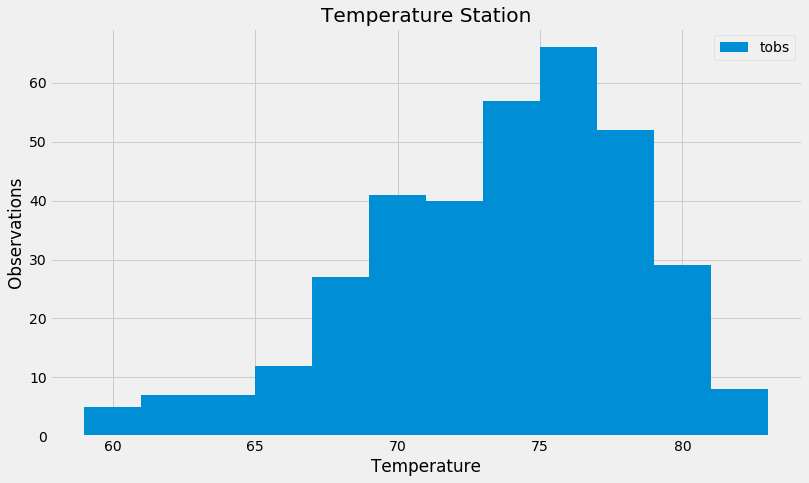

In [90]:
#==============================================================================================
# 13.
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
#==============================================================================================

temp_df = pd.DataFrame(measurement_results)
plt.figure(figsize=(12, 7))
plt.hist(temp_df['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.title(f"Temperature Station")
plt.legend(["tobs"])
plt.show()

([<matplotlib.axis.YTick at 0x1fa76a98ac8>,
 <a list of 5 Text yticklabel objects>)

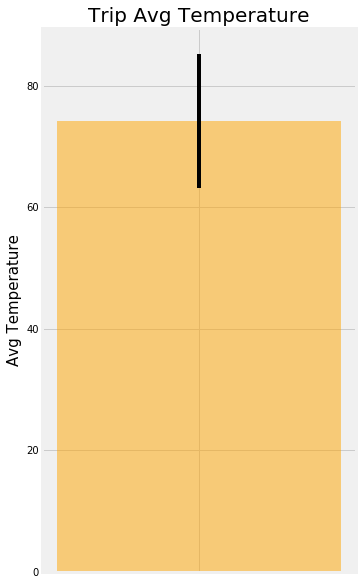

In [63]:
#==============================================================================================
# 14.
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
#==============================================================================================


tmin = temps[0][0]
tavg = temps[0][1]
tmax = temps[0][2]

peaktopeak = tmax - tmin

plt.figure(figsize = (5, 10))
plt.bar(1, tavg, yerr = peaktopeak, tick_label = '', color = 'orange', alpha = 0.5)
plt.ylabel("Avg Temperature", fontsize = 15)
plt.title("Trip Avg Temperature", fontsize = 20)
plt.yticks(np.arange(0, 100, 20), fontsize = 10)


In [91]:
#==============================================================================================
# 15.
# # Calculate the total amount of rainfall per weather station for your trip dates using the 
# previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude,
# longitude, and elevation
#==============================================================================================

sel = [func.sum(Measurement.prcp), Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]

session.query(*sel).filter(Measurement.date >= '2017-03-21').filter(Measurement.date <= '2017-03-28')\
.filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

[(1.3599999999999999,
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 (1.1500000000000001,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (0.76, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (0.52,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (0.15,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (0.02, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (None, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

## Optional Challenge Assignment

In [64]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
